<a href="https://colab.research.google.com/github/Bhageerath123/Machine-Learning-Models-for-Detecting-Malicious-Traffic-in-IoT-Devices-using-IoT-23-Dataset/blob/main/Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

title: preprocessed final_2.csv, id: 1LE5qqd3Jv9aArH83gIIQOzQqrRtkiEsH
title: preprocessed final_1.csv, id: 1LdY_SCqKLJI3O9qY36tNzktBiLY7ZiQd
title: Dtaset 4Labels, id: 1UsYulnKaEz96fbTA9pAhErwybAHpsm7q
title: FINAL DATASET 4.csv, id: 1fRs2RE2LKJ7nW0-4Z95T626wibAlebL3
title: Sample2.csv, id: 15nJR4HagHSkOvLS86Z-I6G2FVwSBsN-x
title: Sample2, id: 1sgUoRPSs1NZT2BwufU2zwca8kXKE8oz6F_0d8zj7fHw
title: preprocessed final.csv, id: 1xOROenk2PKd50HpEaxNcoHIVgT1YzXiv
title: Final Dataset 0 1_1, id: 1-AZmpDkwNCzEXgYBMAhmoaDFEkynhtbf
title: Final Dataset_1_1.csv, id: 1NskVqX2h4KcdhjSRJNeCG5fbpMHOrTCV
title: Final Dataset 0 1_2, id: 1w_V8insIM0L_Y1sfUlgz5tBRsLHC_vz3
title: Final Dataset 0 1, id: 1qOXERY14g_QYB8k-g6bQgqrBI8_bqqsZ
title: Final Dataset, id: 133-6o2oO_nQyjv8z1f0KGNvDU55r_-G1
title: dataset4.csv, id: 18ZHKl1-5V9Abz923O5Zk1KptEL0tRxgb
title: dataset1.csv, id: 18s59CqeQw0r5fjKbpAHCOcqWeKYhRzXB
title: kdd_train.csv, id: 1EpMHv7uUKmYYJRMUwwBaWs_2bXegDxla
title: Final, id: 1B9jeMN_Tyr_og62Jq-

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np




In [ ]:
downloadedTrain = drive.CreateFile({'id': '1UsYulnKaEz96fbTA9pAhErwybAHpsm7q'})
downloadedTrain.GetContentFile('Dataset.csv')

In [ ]:
data3=pd.read_csv('Dataset.csv')

In [ ]:
data3.head()

,ts,uid,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,localorig,localresp,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1.536277e+09,CTsnIbYC9dM50ADli,192.168.100.111,17832,156.40.0.110,37215,tcp,-,2.00E-06,0,0,S0,-,-,0,S,2,80,0,0,9
1,1.532569e+09,CXaf3P377YyQfReoX2,192.168.100.111,16271,62.249.196.245,81,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,3
2,1.536277e+09,CqNgkn3DGvmp3fOreb,192.168.100.111,17576,19.205.47.190,8081,tcp,-,2.00E-06,0,0,S0,-,-,0,S,2,80,0,0,3
3,1.547148e+09,CYw9xh2GJwQTaDnYGg,192.168.1.198,25542,195.97.119.88,23,tcp,-,-,-,-,S0,-,-,0,S,1,40,0,0,1
4,1.545473e+09,CDOohf4Cc8FXPhPsYj,192.168.1.196,25615,54.39.87.104,992,tcp,-,-,-,-,RSTOS0,-,-,0,I,1,40,0,0,6


In [ ]:
data3.dtypes

ts             float64
uid             object
idorighost      object
idorigport       int64
idresphost      object
idrespport       int64
proto           object
service         object
duration        object
origbytes       object
respbytes       object
connstate       object
localorig       object
localresp       object
missedbytes      int64
history         object
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

In [ ]:
#data3.to_csv('data3')

In [ ]:
#data3=pd.read_csv('Final.csv', sep='\t')
#names=["ts",	"uid",	"id.orig_h",	"id.orig_p",	"id.resp_h",	"id.resp_p",	"proto",		"service", 	"duration",	"orig_bytes",	"resp_bytes",	"conn_state",	"local_orig",	"local_resp",	"missed_bytes",	"history", "orig_pkts",	"orig_ip_bytes",	"resp_pkts",	"resp_ip_bytes", "label","detailed-label"])


In [ ]:
data3=data3.drop(['localorig','localresp'], axis=1)

In [ ]:
data3=data3.drop('uid', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
data3['proto'] = data3['proto'].str.replace('-', ' ')
data3['proto'] = data3['proto'].astype(str)
data3['proto'] = encoder.fit_transform(data3['proto'])
data3['service'] = data3['service'].str.replace('-', ' ')
data3['service'] = data3['service'].astype(str)
data3['service'] = encoder.fit_transform(data3['service'])

In [ ]:
encoder = LabelEncoder()
data3['connstate'] = data3['connstate'].str.replace('-', ' ')
data3['connstate'] = data3['connstate'].astype(str)
data3['connstate'] = encoder.fit_transform(data3['connstate'])

In [ ]:
encoder = LabelEncoder()
data3['history'] = data3['history'].str.replace('-', ' ')
data3['history'] = data3['history'].astype(str)
data3['history'] = encoder.fit_transform(data3['history'])

In [ ]:
data3['duration'] = data3['duration'].str.replace('S0', ' ')

In [ ]:
data3['duration'] = data3['duration'].str.replace('-', ' ')

In [ ]:
data3['duration'] = pd.to_numeric(data3['duration'], errors='coerce')

In [ ]:
#data3['duration'] = data3['duration'].astype(str).astype(float)

In [ ]:
data3['origbytes'] = data3['origbytes'].str.replace('-', ' ')

In [ ]:
data3['origbytes'] = pd.to_numeric(data3['origbytes'], errors='coerce')

In [ ]:
data3['respbytes'] = data3['respbytes'].str.replace('-', ' ')

In [ ]:
data3['respbytes'] = pd.to_numeric(data3['respbytes'], errors='coerce')

In [ ]:
data3['idorighost'] = data3['idorighost'].str.replace('-', ' ')

In [ ]:
data3['idresphost'] = data3['idresphost'].str.replace('-', ' ')

In [ ]:
encoder = LabelEncoder()
data3['idorighost'] = data3['idorighost'].astype(str)
data3['idorighost'] = encoder.fit_transform(data3['idorighost'])

In [ ]:
encoder = LabelEncoder()
data3['idresphost'] = data3['idresphost'].astype(str)
data3['idresphost'] = encoder.fit_transform(data3['idresphost'])

In [ ]:
data3.dtypes

ts             float64
idorighost       int64
idorigport       int64
idresphost       int64
idrespport       int64
proto            int64
service          int64
duration       float64
origbytes      float64
respbytes      float64
connstate        int64
missedbytes      int64
history          int64
origpkts         int64
origipbytes      int64
resppkts         int64
respipbytes      int64
Label            int64
dtype: object

Instead of converting each feature to int/float datatype seperately, we can use the below coade using for loop.
cat_features means categorical Features

In [ ]:
#cat_features=[x for x in data3.columns if data3[x].dtype=="object"]

#le=LabelEncoder()

#for col in cat_features:
    #if col in data3.columns:
       # i = data3.columns.get_loc(col)
       # data3.iloc[:,i] = data3.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
np.any(np.isnan(data3))

True

In [ ]:
data3.isna().sum()

ts                   0
idorighost           0
idorigport           0
idresphost           0
idrespport           0
proto                0
service              0
duration       3368934
origbytes      2699139
respbytes      2699139
connstate            0
missedbytes          0
history              0
origpkts             0
origipbytes          0
resppkts             0
respipbytes          0
Label                0
dtype: int64

In [ ]:
data3.head()

,ts,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1.536277e+09,24,17832,802834,37215,1,0,NaN,0.0,0.0,6,0,8,2,80,0,0,9
1,1.532569e+09,24,16271,2557175,81,1,0,NaN,NaN,NaN,6,0,8,1,40,0,0,3
2,1.536277e+09,24,17576,1229657,8081,1,0,NaN,0.0,0.0,6,0,8,2,80,0,0,3
3,1.547148e+09,20,25542,1297296,23,1,0,NaN,NaN,NaN,6,0,8,1,40,0,0,1
4,1.545473e+09,18,25615,2494793,992,1,0,NaN,NaN,NaN,3,0,7,1,40,0,0,6


In [ ]:
data3[['duration','origbytes','respbytes']] = data3[['duration','origbytes','respbytes']].fillna(value=data3[['duration','origbytes','respbytes']].mean())

In [ ]:
data3.head()

,ts,idorighost,idorigport,idresphost,idrespport,proto,service,duration,origbytes,respbytes,connstate,missedbytes,history,origpkts,origipbytes,resppkts,respipbytes,Label
0,1.536277e+09,24,17832,802834,37215,1,0,7.200253,0.000000e+00,0.000000,6,0,8,2,80,0,0,9
1,1.532569e+09,24,16271,2557175,81,1,0,7.200253,4.336022e+08,2.050967,6,0,8,1,40,0,0,3
2,1.536277e+09,24,17576,1229657,8081,1,0,7.200253,0.000000e+00,0.000000,6,0,8,2,80,0,0,3
3,1.547148e+09,20,25542,1297296,23,1,0,7.200253,4.336022e+08,2.050967,6,0,8,1,40,0,0,1
4,1.545473e+09,18,25615,2494793,992,1,0,7.200253,4.336022e+08,2.050967,3,0,7,1,40,0,0,6


In [ ]:
data3.isna().sum()

ts             0
idorighost     0
idorigport     0
idresphost     0
idrespport     0
proto          0
service        0
duration       0
origbytes      0
respbytes      0
connstate      0
missedbytes    0
history        0
origpkts       0
origipbytes    0
resppkts       0
respipbytes    0
Label          0
dtype: int64

In [ ]:
data3.nunique()

ts              483002
idorighost          40
idorigport       65536
idresphost     2960759
idrespport          25
proto                3
service              5
duration        395857
origbytes        15851
respbytes          248
connstate           13
missedbytes          4
history             71
origpkts           235
origipbytes        749
resppkts            63
respipbytes        436
Label                4
dtype: int64

In [ ]:
y=pd.get_dummies(data3['Label'])
#y=data3['Label']

In [ ]:
x=data3.drop(['Label'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=2)

In [ ]:
y_train

,1,3,6,9
1237325,0,0,1,0
200708,0,1,0,0
2548732,0,1,0,0
3857057,1,0,0,0
1264230,0,1,0,0
...,...,...,...,...
3583510,1,0,0,0
3765832,0,1,0,0
2300397,1,0,0,0
2198031,1,0,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
import sys
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
st=StandardScaler()
st.fit(x_train)
x_train=pd.DataFrame(st.transform(x_train))
x_test=pd.DataFrame(st.transform(x_test))

In [ ]:
  x_train.shape
x_test.shape

(1199886, 17)

Logistc Regression as classifier using tensfor flow

In [ ]:
weights = tf.Variable(tf.random.normal(shape=(17, 4), dtype=tf.float64))
biases  = tf.Variable(tf.random.normal(shape=(4,), dtype=tf.float64))

In [ ]:
def logistic_regression(x):
    lr = tf.add(tf.matmul(x, weights), biases)
    return lr


def cross_entropy(y_true, y_pred):
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)

def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights, biases])

In [ ]:
epochs=2000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    
    dw,db=grad(inputs,tf.cast(outputs,'float32'))
    
    weights.assign_sub(learning_rate*dw)
    biases.assign_sub(learning_rate*db)
    
    if epoch%200==0:
        print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

Logistic regression as classfier with hidden layers using tensor flow

In [ ]:
weights_h = tf.Variable(tf.random.truncated_normal(shape=(17, 8), dtype=tf.float64))
biases_h  = tf.Variable(tf.random.truncated_normal(shape=(8,), dtype=tf.float64))

weights_o = tf.Variable(tf.random.truncated_normal(shape=(8, 4), dtype=tf.float64))
biases_o  = tf.Variable(tf.random.truncated_normal(shape=(4,), dtype=tf.float64))

In [ ]:
def logistic_regression(x):
    h_o = tf.add(tf.matmul(x, weights_h), biases_h)
    h_o=tf.nn.relu(h_o)
    lr=tf.add(tf.matmul(h_o, weights_o), biases_o)
    return lr


def cross_entropy(y_true, y_pred):

    loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return tf.reduce_mean(loss)


def accuracy(y_true, y_pred):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32)
    preds = tf.cast(tf.argmax(y_pred, axis=1), dtype=tf.int32)
    preds = tf.equal(y_true, preds)
    return tf.reduce_mean(tf.cast(preds, dtype=tf.float32))

def roc_auc(y_true,x):
    y_true = tf.cast(tf.argmax(y_true, axis=1), dtype=tf.int32).numpy()
    y_pred=tf.nn.softmax(logistic_regression(x))[:,1]
    return(roc_auc_score(y_true,y_pred))

def grad(x, y):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(x)
        loss_val = cross_entropy(y, y_pred)
    return tape.gradient(loss_val, [weights_h, biases_h,weights_o, biases_o])

In [ ]:
epochs=2000

In [ ]:
learning_rate=0.1
for epoch in range(epochs):
    rand_ind=np.random.choice(range(x_train.shape[0]),100)
    outputs=y_train.iloc[rand_ind,:].values
    inputs=x_train.iloc[rand_ind,:].values
    dw_h,db_h,dw_o,db_o=grad(inputs,tf.cast(outputs,'float32'))
    
    weights_h.assign_sub(learning_rate*dw_h)
    biases_h.assign_sub(learning_rate*db_h)
    weights_o.assign_sub(learning_rate*dw_o)
    biases_o.assign_sub(learning_rate*db_o)
    
    if epoch%200==0:
        print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())
    
    

0.4780596
0.91398436
0.9743684
0.9759869
0.9829984
0.9849161
0.9850227
0.98620117
0.9886522
0.9887114


In [ ]:
 print(accuracy(y_test.values,logistic_regression(x_test.values)).numpy())

0.98863393


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
y_pred=np.argmax(logistic_regression(x_test), axis=1)

In [ ]:
y_pred

array([2, 3, 1, ..., 1, 1, 0])

In [ ]:
y_test=np.argmax(y_test.values, axis=1)
y_test[1]

3

In [ ]:
y_test

array([2, 3, 1, ..., 1, 1, 0])

In [ ]:
print('Precision: {:.5f}'.format(precision_score(y_test,y_pred,average="macro")))
print('Recall: {:.5f}'.format(recall_score(y_test,y_pred,average="macro")))
print('F1-score: {:.5f}\n'.format(f1_score(y_test,y_pred,average="macro")))

Precision: 0.98905
Recall: 0.98865
F1-score: 0.98862



In [ ]:
confusion_matrix(y_test, y_pred)

array([[298228,      7,      3,      8],
       [   634, 286806,      3,  12852],
       [     0,     54, 301657,      0],
       [     0,     77,      0, 299557]])

Text(0.5, 257.44, 'Predicted label')

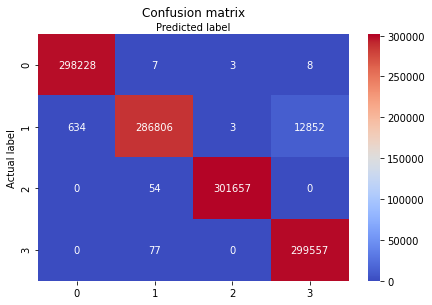

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
class_names=[1,3,6,9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
n_classes = y.shape[1]

In [ ]:
n_classes

4

In [ ]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])

In [ ]:
y_pred= label_binarize(y_pred, classes=[0, 1, 2, 3])

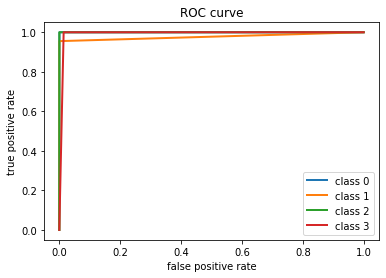

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

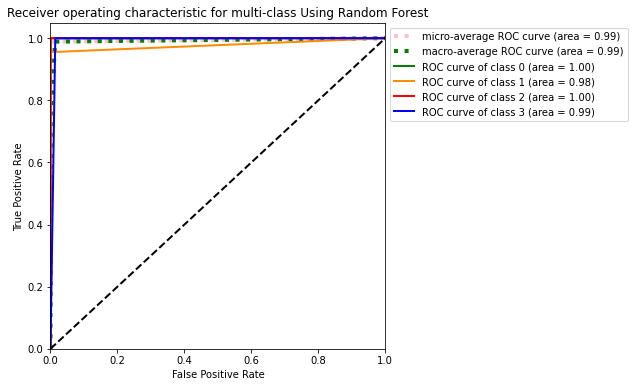

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_pred, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_pred, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.992430 (macro),
0.992426 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.992430 (macro),
0.992426 (weighted by prevalence)


In [ ]:
from sklearn.metrics import precision_recall_curve

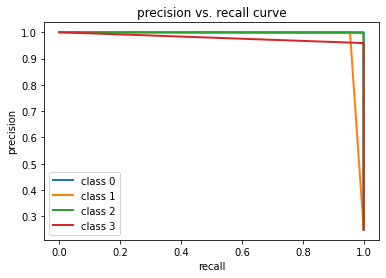

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# **Decision Tree, Random Forest and XGBoost Classifier**

In [ ]:
X=data3.drop(['Label'],axis=1)

In [ ]:
Y=data3['Label']

In [ ]:
Y

0          9
1          3
2          3
3          1
4          6
          ..
3999615    3
3999616    6
3999617    9
3999618    6
3999619    6
Name: Label, Length: 3999620, dtype: int64

In [ ]:
Y

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =42)

Decision Tree Classifier using scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dtree.fit(X_train,Y_train)
Y_predsDT = dtree.predict(X_test)


In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
accuracy_score(Y_test,Y_predsDT)

0.9999958329374624

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsDT, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsDT, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsDT, average='macro')))

Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000



In [ ]:
from sklearn import metrics

In [ ]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

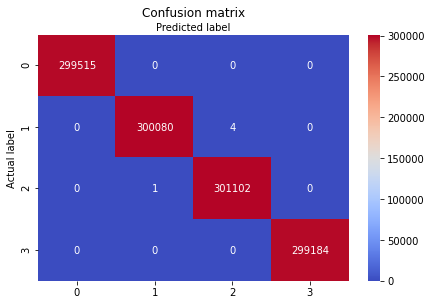

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsDT)
class_names=[1,3,6,9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
confusion_matrix(Y_test, Y_predsDT)

array([[299515,      0,      0,      0],
       [     0, 300080,      4,      0],
       [     0,      1, 301102,      0],
       [     0,      0,      0, 299184]])

ROC_AUC curve for Multiclass

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
Y = label_binarize(Y, classes=[1,3,6,9])
n_classes = Y.shape[1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =42)

In [ ]:
dtree.fit(X_train,Y_train)
Y_predsDT = dtree.predict(X_test)

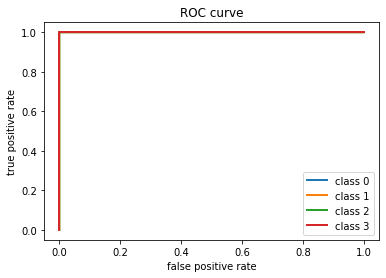

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i],
                                  Y_predsDT[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [ ]:
YpredsDT_prob = dtree.predict_proba(X_test)

Another Method for ROC_AUC curve for Multiclass

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsDT[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsDT.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


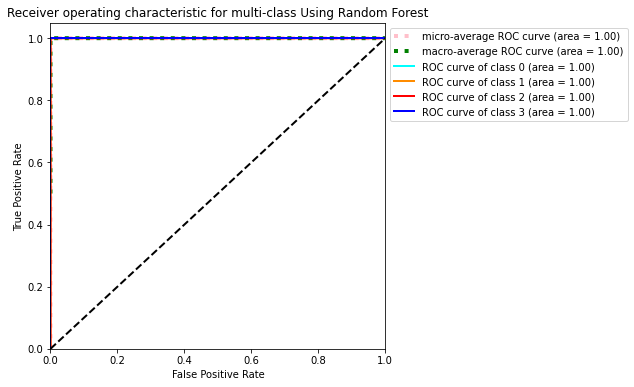

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

AUC score for Multi-Class

In [ ]:
YpredsDT_prob = dtree.predict_proba(X_test)

In [ ]:
macro_roc_auc_ovo = roc_auc_score(Y_test, YpredsDT_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test,YpredsDT_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, YpredsDT_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test,YpredsDT_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.999997 (macro),
0.999997 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999997 (macro),
0.999997 (weighted by prevalence)


Precision-Recall curve for Multiclass

In [ ]:
from sklearn.metrics import precision_recall_curve

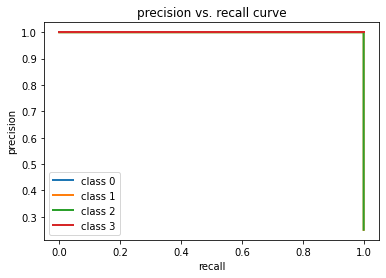

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsDT[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

RandomForest Classifier using Scikit-Learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)
Y_predsRF = rf.predict(X_test)

print('With Random Forest accuracy is: ',rf.score(X_test,Y_test))

With Random Forest accuracy is:  0.9999958329374624


In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsRF, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsRF, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsRF, average='macro')))

Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000



In [ ]:
confusion_matrix(Y_test, Y_predsRF)

array([[299515,      0,      0,      0],
       [     0, 300084,      0,      0],
       [     0,      0, 301103,      0],
       [     1,      4,      0, 299179]])

Text(0.5, 257.44, 'Predicted label')

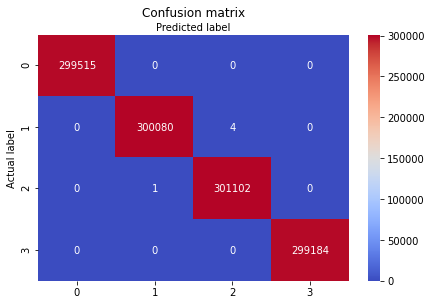

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsDT)
class_names=[1,3,6,9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TO PLOT ROC_CURVE and CALCULATE AUC_SCORE for MULTICLASS FOLLOW THE BELOW CODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
Y = label_binarize(Y, classes=[1,3,6,9])
n_classes = Y.shape[1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =42)

In [ ]:
rf.fit(X_train,Y_train)
Y_predsRF = rf.predict(X_test)

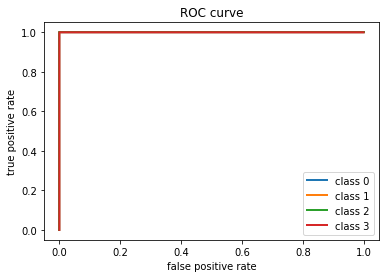

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i],
                                  Y_predsRF[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Another Method for RoC_Curve

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsRF[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsRF.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


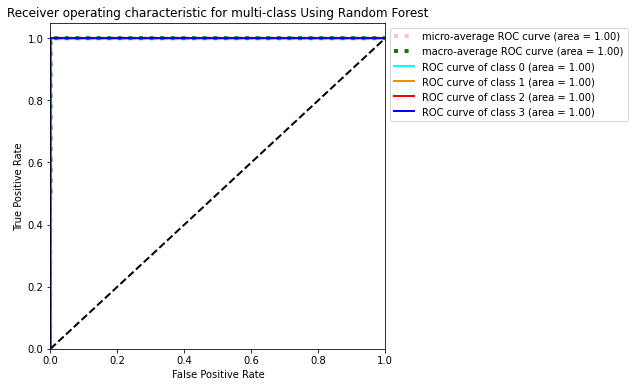

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

AUC Score for Multiclass

In [ ]:
YpredsRF_prob = rf.predict_proba(X_test)

In [ ]:
macro_roc_auc_ovo = roc_auc_score(Y_test, YpredsDT_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test,YpredsDT_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, YpredsDT_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test,YpredsDT_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.999997 (macro),
0.999997 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999997 (macro),
0.999997 (weighted by prevalence)


Precision-Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve

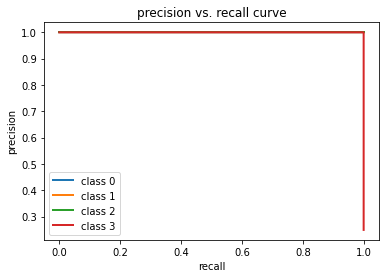

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsRF[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

XGBoost Classifier Using Scikit-Learn

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Y_predsXGB=xgb.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_predsXGB)

0.9999608296121465

In [ ]:
print('Precision: {:.5f}'.format(precision_score(Y_test, Y_predsXGB, average='macro')))
print('Recall: {:.5f}'.format(recall_score(Y_test, Y_predsXGB, average='macro')))
print('F1-score: {:.5f}\n'.format(f1_score(Y_test, Y_predsXGB, average='macro')))

Precision: 0.99996
Recall: 0.99996
F1-score: 0.99996



In [ ]:
confusion_matrix(Y_test, Y_predsXGB)


array([[299508,      0,      7,      0],
       [     0, 300084,      0,      0],
       [     0,     40, 301063,      0],
       [     0,      0,      0, 299184]])

Text(0.5, 257.44, 'Predicted label')

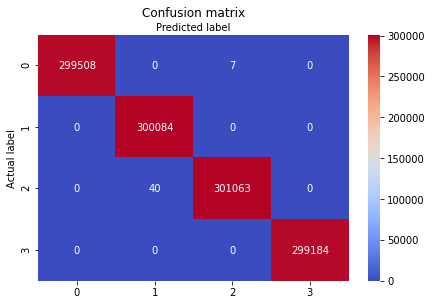

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predsXGB)
class_names=[1,3,6,9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ROC_AUC curve for Multi-Class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])

In [ ]:
Y = label_binarize(Y, classes=[1,3,6,9])
n_classes = Y.shape[1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =42)

In [ ]:
xgb=OneVsRestClassifier(XGBClassifier())

In [ ]:
xgb.fit(X_train,Y_train)
Y_predsXGB = xgb.predict(X_test)

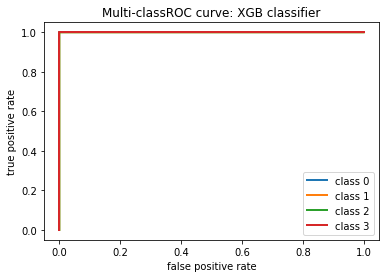

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i],
                                  Y_predsXGB[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Multi-classROC curve: XGB classifier")
plt.show()

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_predsXGB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_predsXGB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


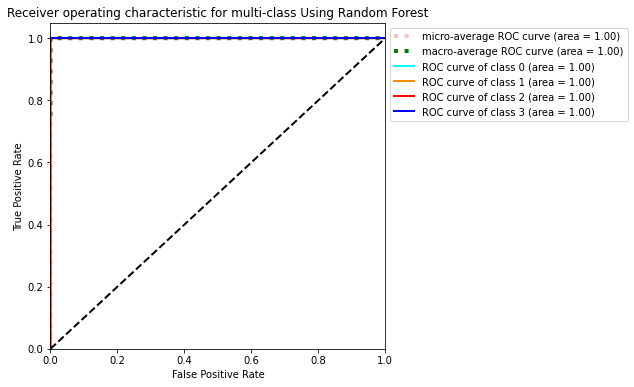

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using Random Forest')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
YpredsXGB_prob = xgb.predict_proba(X_test)

In [ ]:
macro_roc_auc_ovo = roc_auc_score(Y_test, YpredsXGB_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test,YpredsXGB_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, YpredsXGB_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test,YpredsXGB_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


In [ ]:
from sklearn.metrics import precision_recall_curve

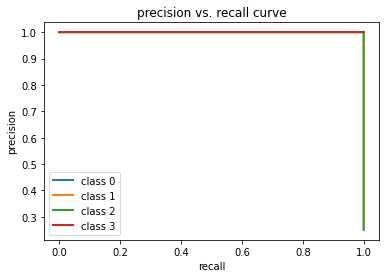

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        Y_predsXGB[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

Multi-Class Classification Using ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
X = data3.drop('Label',axis=1)

In [ ]:
y=data3['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
Y

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [ ]:
X.shape

(3999620, 17)

In [ ]:
model = Sequential()

model.add(Dense(17,input_shape=(17,), activation='relu'))
#hidden Layer
model.add(Dense(8,input_shape=(8,), activation='relu'))

model.add(Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
27998/27998 [==============================] - 231s 8ms/step - loss: 0.1179 - accuracy: 0.9697
Epoch 2/5
27998/27998 [==============================] - 233s 8ms/step - loss: 0.0067 - accuracy: 0.9999
Epoch 3/5
27998/27998 [==============================] - 232s 8ms/step - loss: 0.0088 - accuracy: 0.9999
Epoch 4/5
27998/27998 [==============================] - 232s 8ms/step - loss: 0.0062 - accuracy: 0.9999
Epoch 5/5
27998/27998 [==============================] - 233s 8ms/step - loss: 0.0023 - accuracy: 0.9999


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299515
           1       1.00      1.00      1.00    300084
           2       1.00      1.00      1.00    301103
           3       1.00      1.00      1.00    299184

    accuracy                           1.00   1199886
   macro avg       1.00      1.00      1.00   1199886
weighted avg       1.00      1.00      1.00   1199886

[[299506      3      0      6]
 [     0 300082      2      0]
 [     0     43 301058      2]
 [     0      0      0 299184]]


Text(0.5, 257.44, 'Predicted label')

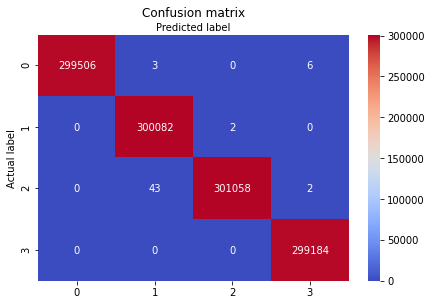

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test_class, y_pred_class)
class_names=[1,3,6,9]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer

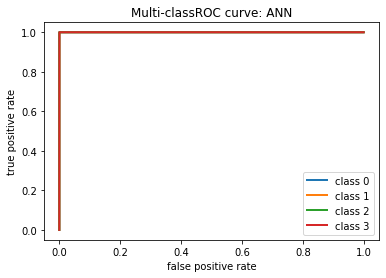

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("Multi-classROC curve: ANN")
plt.show()

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


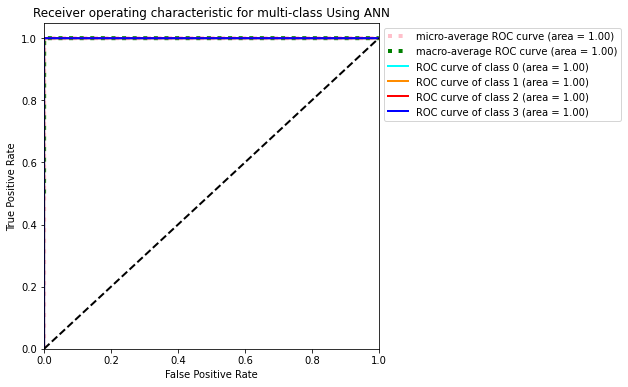

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

plt.figure(figsize=(6,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'red','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class Using ANN')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

In [ ]:
y_preds_prob = model.predict_proba(X_test)

In [ ]:
macro_roc_auc_ovo = roc_auc_score(y_test, y_preds_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test,y_preds_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_preds_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test,y_preds_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.999993 (macro),
0.999993 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999993 (macro),
0.999993 (weighted by prevalence)


In [ ]:
from sklearn.metrics import precision_recall_curve

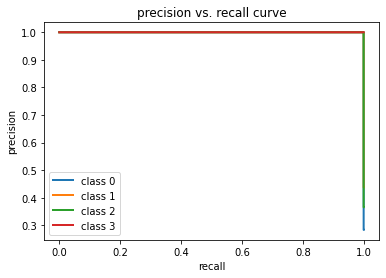

In [ ]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()